In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
import requests
import matplotlib
import graphviz
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [2]:
avocado = pd.read_csv("avocado.csv")

In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [5]:
#dropping "unnamed" column since its just a serial number and no use for it.
#segregating the dates into date, month & year and the date then dropping year column since it is duplicate.

avocado.drop("Unnamed: 0", axis = 1, inplace=True)


In [6]:
avocado['Year'], avocado['Month'], avocado['Day'] = avocado['Date'].str.split('-').str
avocado.drop(columns=['Date','year'], inplace=True)
avocado


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [7]:
avocado['Year']=avocado['Year'].astype(int)
avocado['Month']=avocado['Month'].astype(int)
avocado['Date']=avocado['Day'].astype(int)
avocado.drop(columns=['Day'], inplace=True)
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [8]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  int32  
 12  Month         18249 non-null  int32  
 13  Date          18249 non-null  int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 1.7+ MB


In [9]:
avocado.columns #renaming the columns for easier usage.

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'Date'],
      dtype='object')

In [10]:
avocado.rename(columns={'Date': 'date', 'AveragePrice': 'avgprice', 'Total Volume': 'totalvolume', 'Total Bags': 'totalbag', 'Small Bags': 'smallbags', 
                         'Large Bags':'largebags', 'XLarge Bags': 'xlbags', 'Month': 'month', 'Year': 'year'}, inplace=True)
avocado.head()


,avgprice,totalvolume,4046,4225,4770,totalbag,smallbags,largebags,xlbags,type,region,year,month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [11]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avgprice     18249 non-null  float64
 1   totalvolume  18249 non-null  float64
 2   4046         18249 non-null  float64
 3   4225         18249 non-null  float64
 4   4770         18249 non-null  float64
 5   totalbag     18249 non-null  float64
 6   smallbags    18249 non-null  float64
 7   largebags    18249 non-null  float64
 8   xlbags       18249 non-null  float64
 9   type         18249 non-null  object 
 10  region       18249 non-null  object 
 11  year         18249 non-null  int32  
 12  month        18249 non-null  int32  
 13  date         18249 non-null  int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 1.7+ MB


In [12]:
avocado.isna().sum() #checked for missing values, and there are no missing values.

avgprice       0
totalvolume    0
4046           0
4225           0
4770           0
totalbag       0
smallbags      0
largebags      0
xlbags         0
type           0
region         0
year           0
month          0
date           0
dtype: int64

In [13]:
avocado.describe().T #there seem to be a zero value in 4046, 4225, 4770, totalbag, smallbags, largebags, xlbags however these seems to legit one.

,count,mean,std,min,25%,50%,75%,max
avgprice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
totalvolume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
totalbag,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
smallbags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
largebags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
xlbags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [14]:
avocado.nunique() #finding unique values for insight on how many categorial options.

avgprice         259
totalvolume    18237
4046           17702
4225           18103
4770           12071
totalbag       18097
smallbags      17321
largebags      15082
xlbags          5588
type               2
region            54
year               4
month             12
date              31
dtype: int64

In [15]:
avocado.skew() #finding skewness value to check the acceptable range (+/-0.5)

avgprice        0.580303
totalvolume     9.007687
4046            8.648220
4225            8.942466
4770           10.159396
totalbag        9.756072
smallbags       9.540660
largebags       9.796455
xlbags         13.139751
year            0.215339
month           0.106617
date            0.014310
dtype: float64

# creating visualization

In [16]:
#Univariate Analysis using count plot

conventional    9126
organic         9123
Name: type, dtype: int64


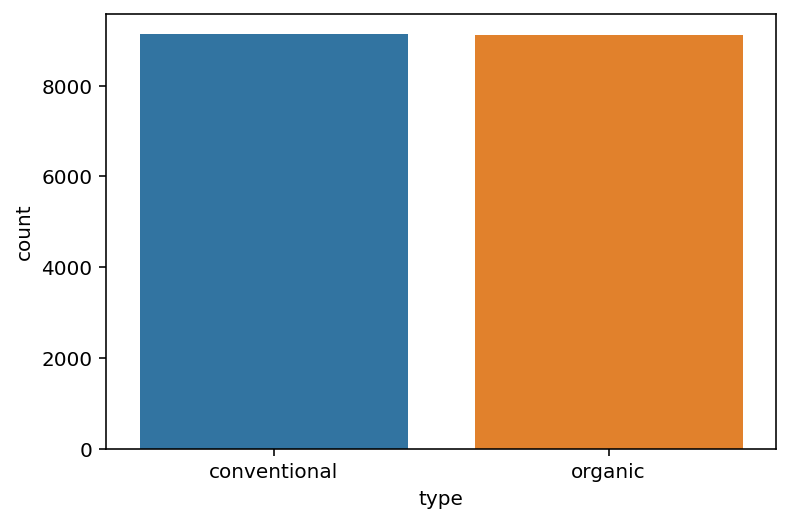

In [17]:
print(avocado['type'].value_counts())
ax = sns.countplot(x="type", data=avocado)
plt.show()

#finding datas in types column. it is conventional and organic avocado.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


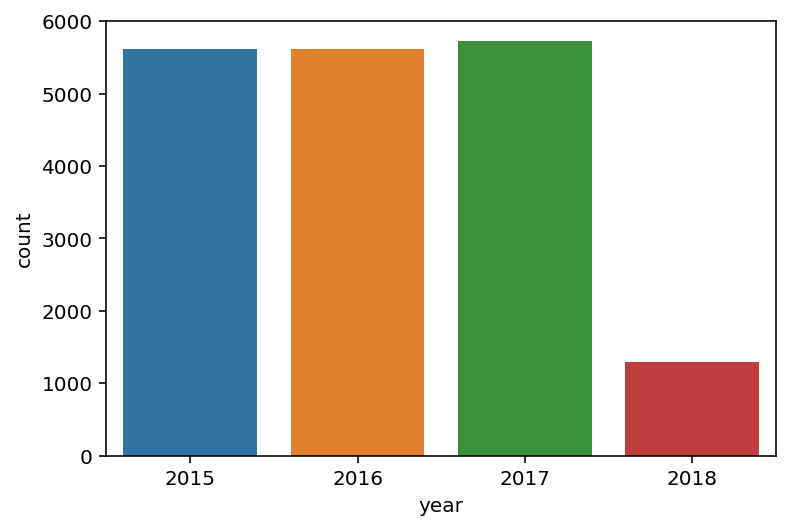

In [18]:
print(avocado['year'].value_counts())
ax = sns.countplot(x="year", data=avocado)
plt.show()

#finding datas in year column. compared to all the year 2018 has lesser data.

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<Figure size 1296x360 with 0 Axes>

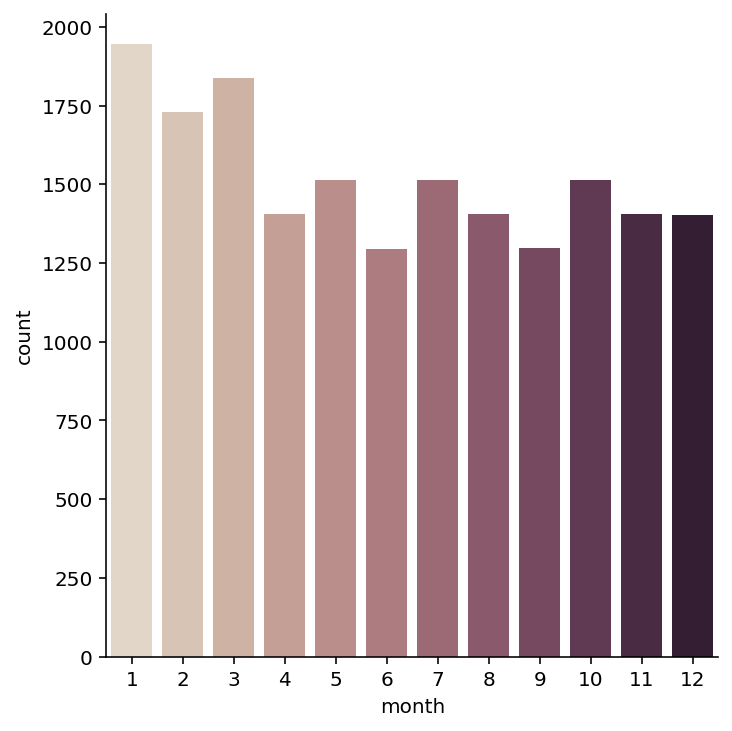

In [19]:
print(avocado['month'].value_counts())
plt.figure(figsize=(18,5))
sns.catplot(x="month", kind="count", palette="ch:.25", data=avocado)
plt.show()

#on result data comparisson Jan (1) has a highest number, and june (6) is a least.

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: date, dtype: int64


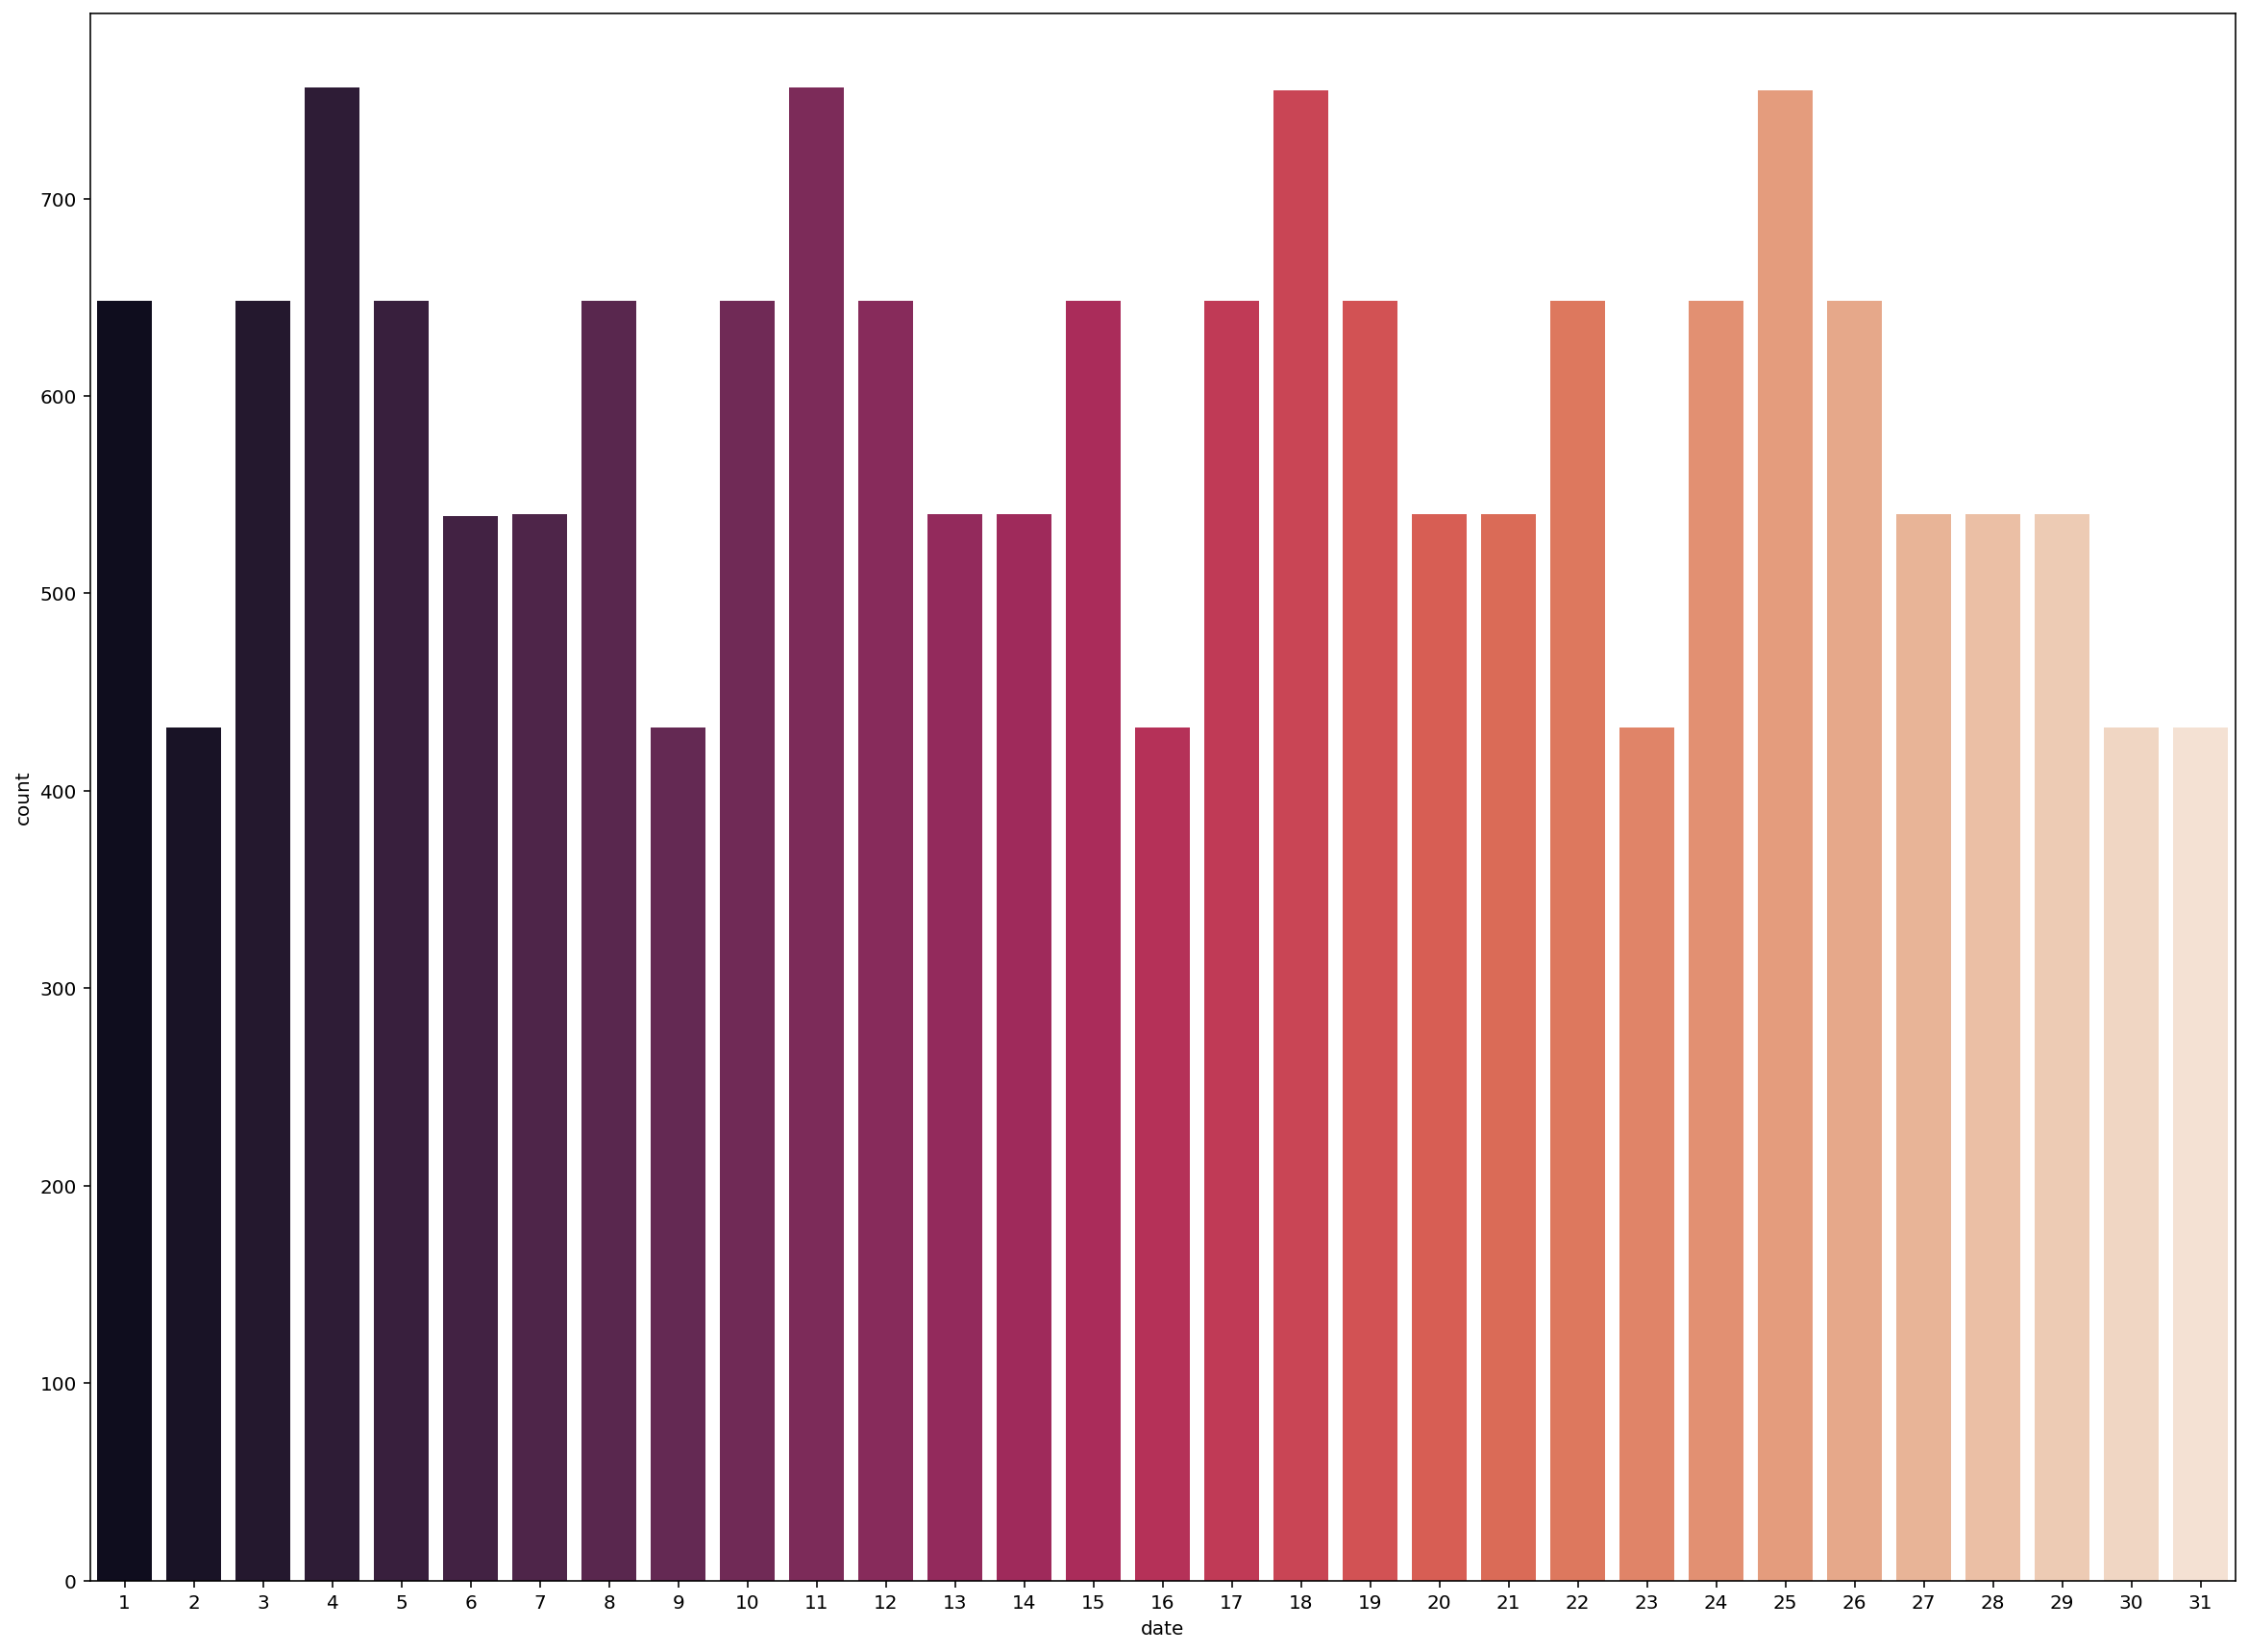

In [20]:
print(avocado['date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='date', data=avocado, palette="rocket")
plt.show()

#on result data comparisson having highest value = 11 and 4 for lowest value = 30,16,9,23,2,31

Roanoke                338
Atlanta                338
CincinnatiDayton       338
SanDiego               338
RaleighGreensboro      338
Indianapolis           338
Philadelphia           338
Houston                338
Boston                 338
HarrisburgScranton     338
MiamiFtLauderdale      338
California             338
Nashville              338
Southeast              338
Seattle                338
Denver                 338
Chicago                338
StLouis                338
Midsouth               338
Sacramento             338
SouthCarolina          338
Albany                 338
Portland               338
Spokane                338
NewYork                338
Orlando                338
HartfordSpringfield    338
GrandRapids            338
Pittsburgh             338
Plains                 338
BaltimoreWashington    338
GreatLakes             338
Charlotte              338
Boise                  338
TotalUS                338
RichmondNorfolk        338
LosAngeles             338
S

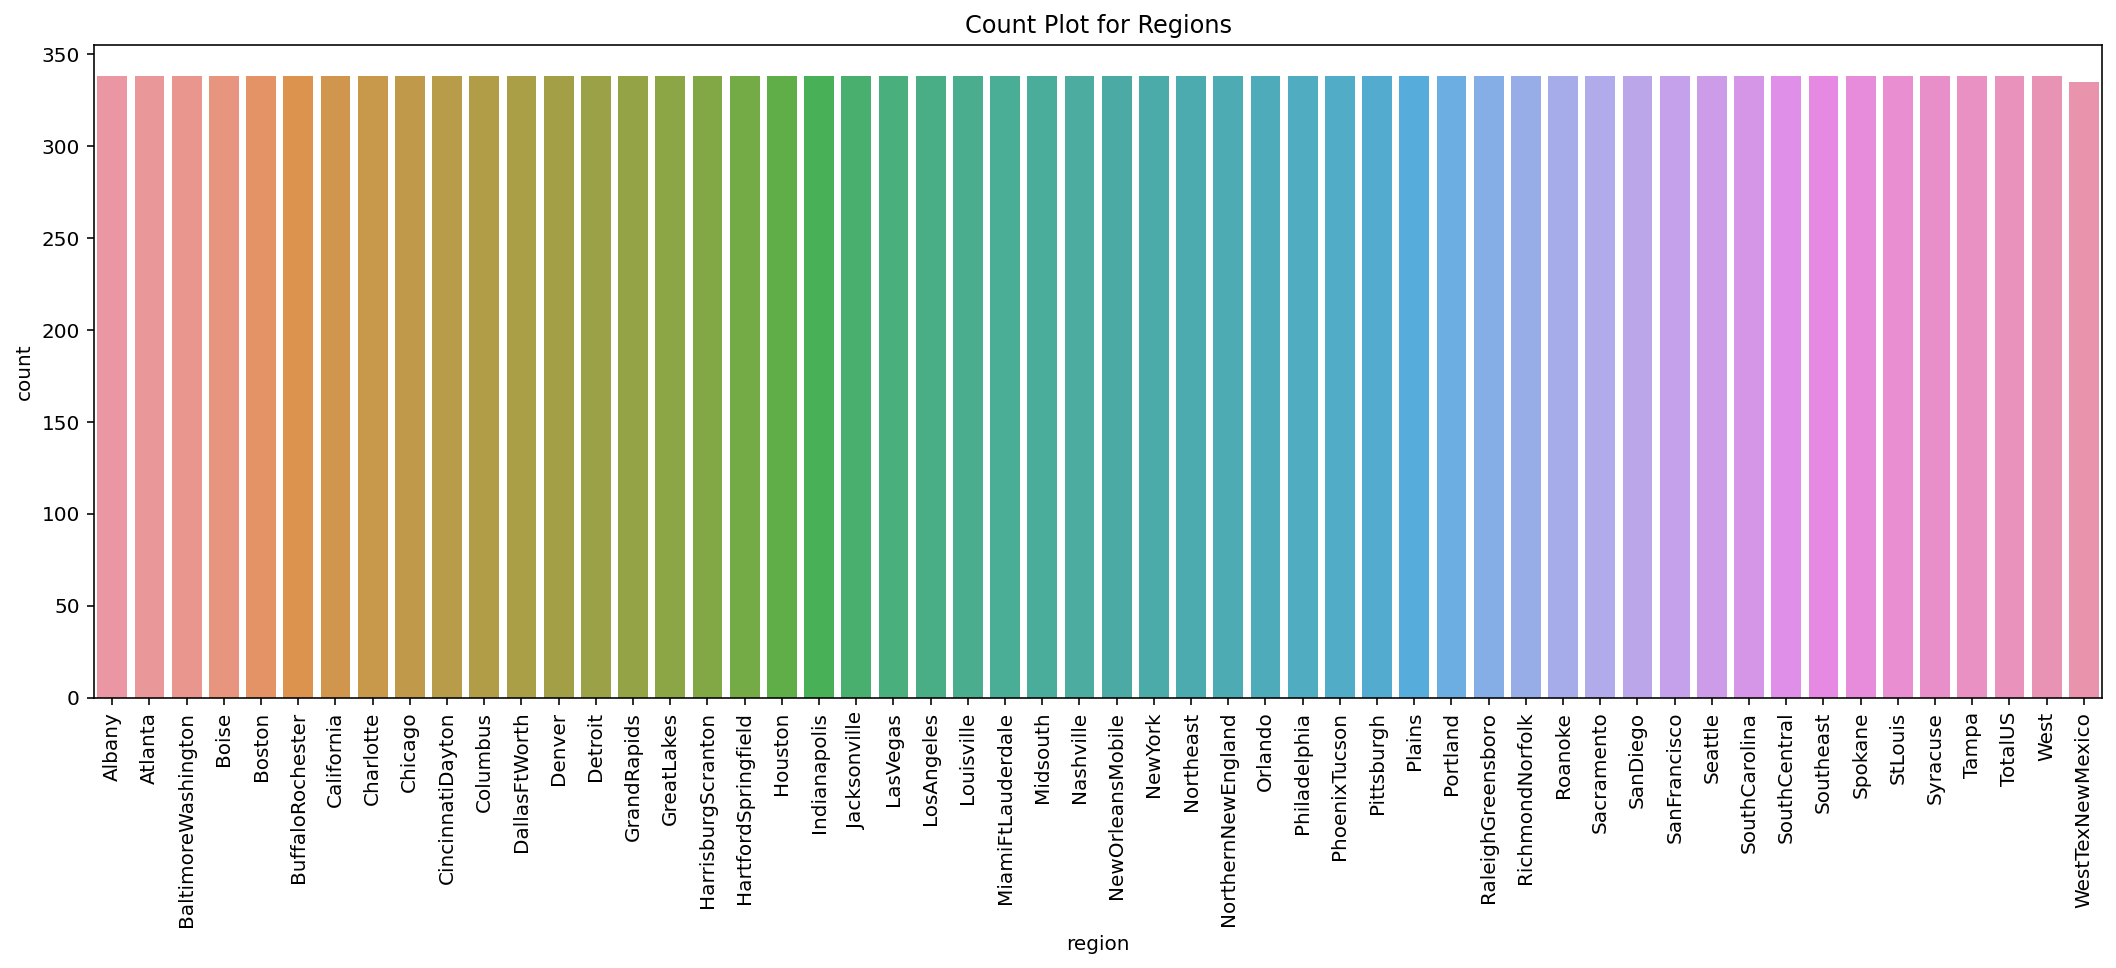

In [21]:
print(avocado['region'].value_counts())
plt.figure(figsize=(18,6))
sns.countplot(avocado['region'], data=avocado)
plt.title(f'Count Plot for Regions')
plt.xticks(rotation=90)
plt.show()

#found only the least value for WestTexNewMexico.

In [22]:
#Bivariate analysis

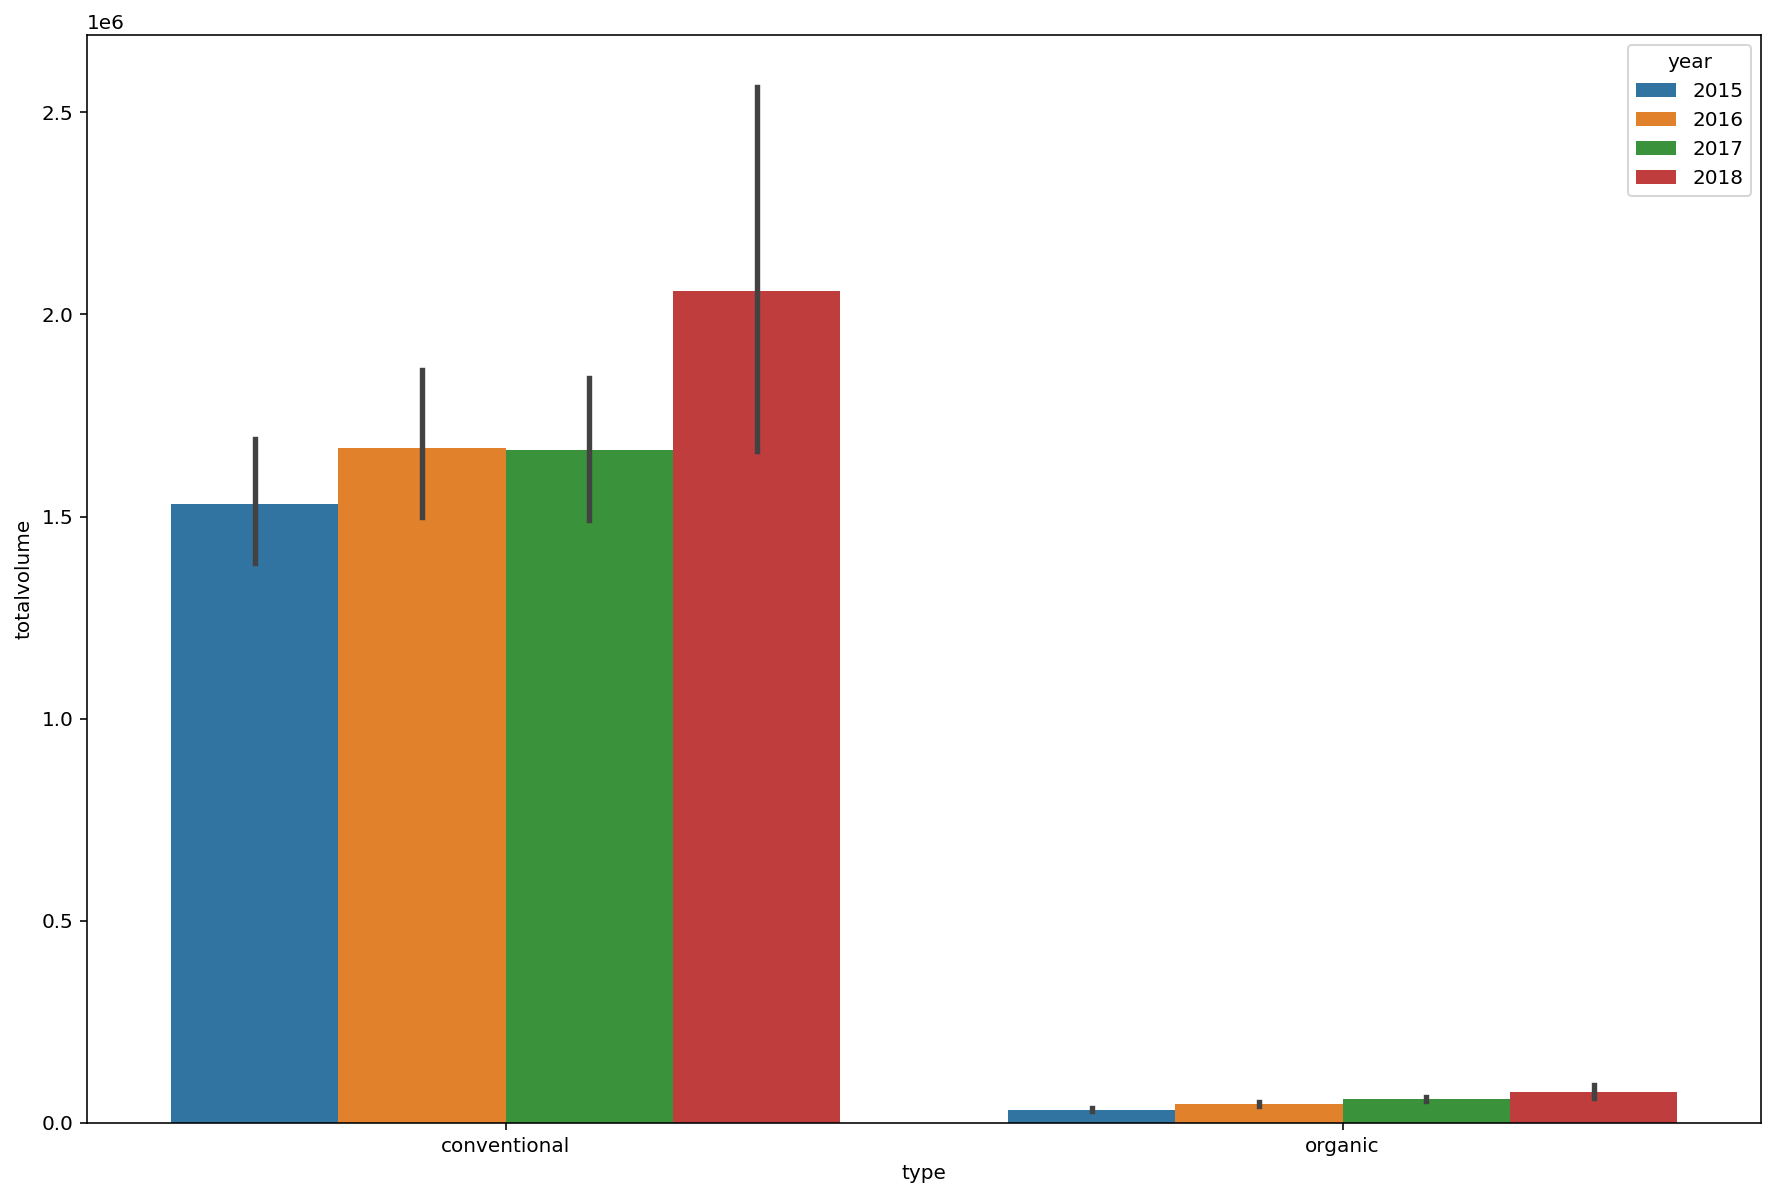

In [23]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="type", y="totalvolume", hue="year", data=avocado)
plt.show() #conventional avocado leading in all 4 years compared to organic.

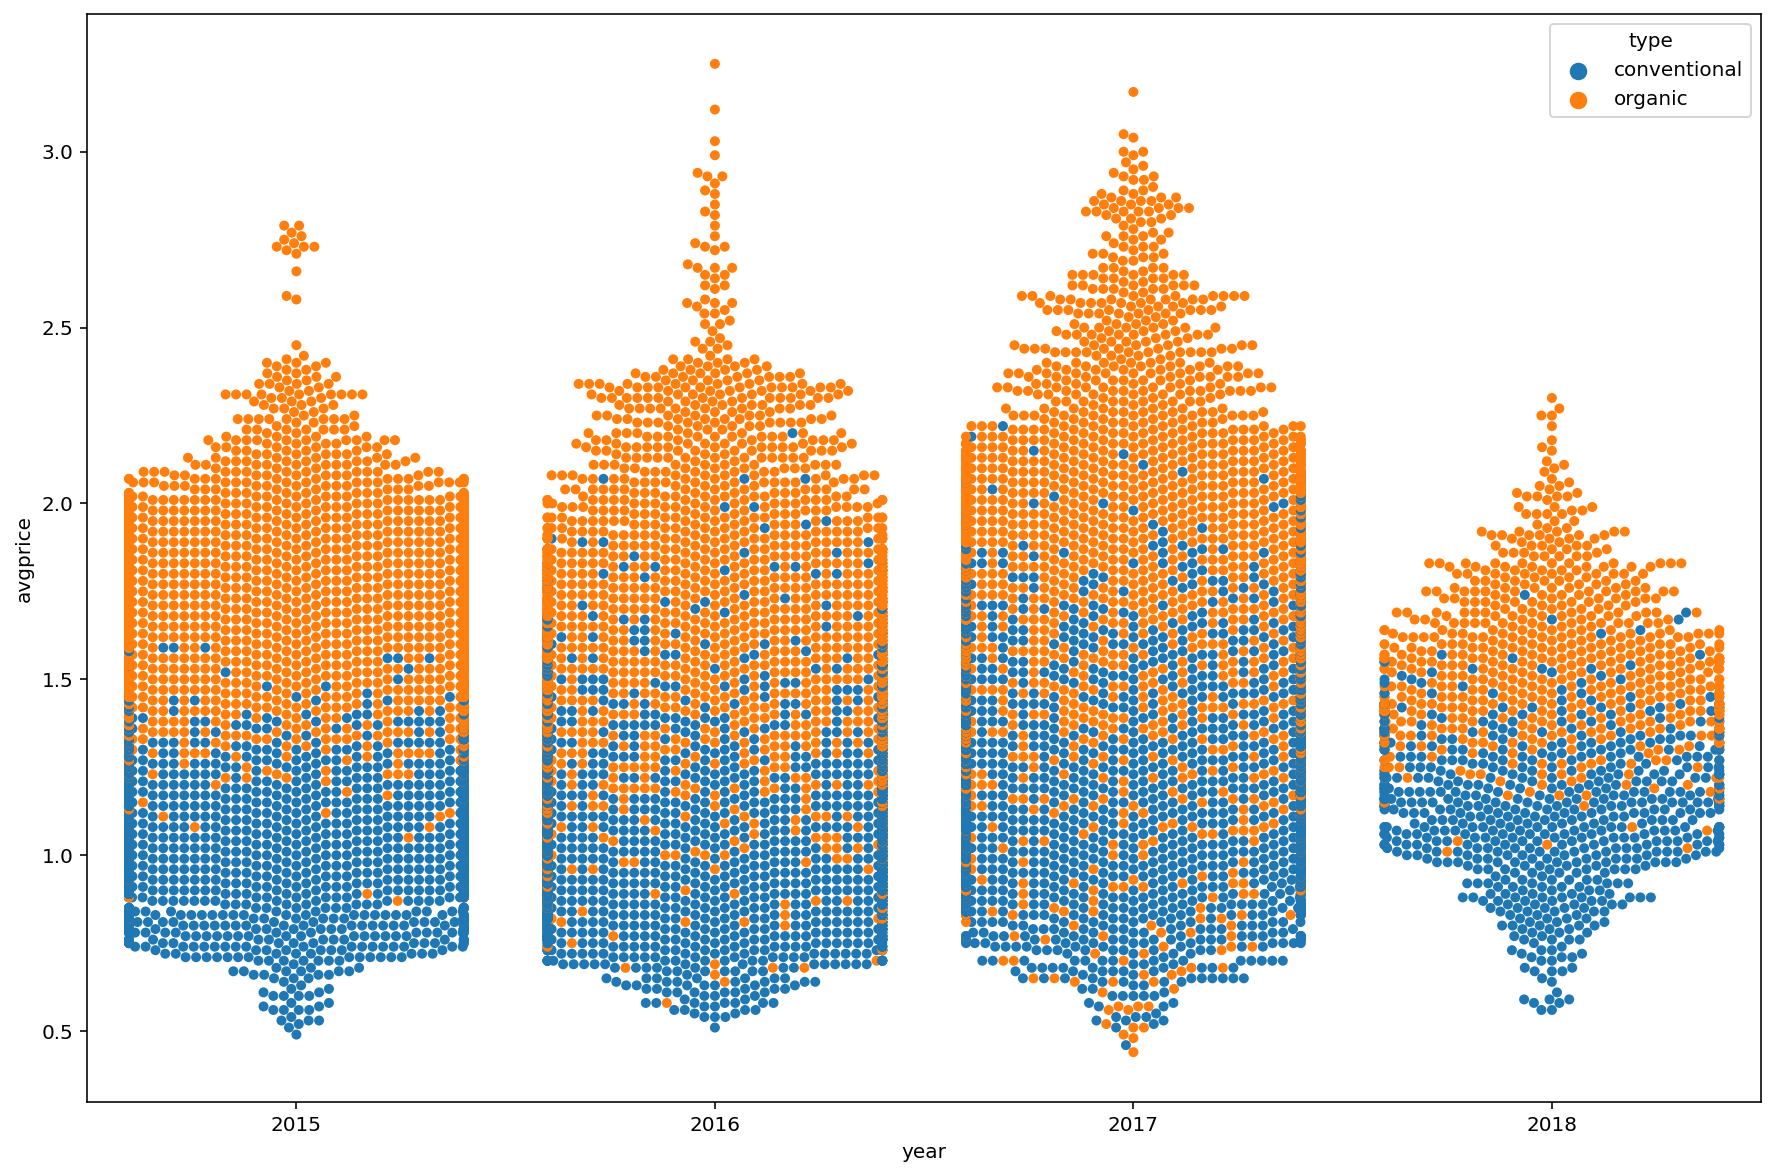

In [24]:
plt.figure(figsize=(15,10))
ax = sns.swarmplot(x="year", y="avgprice", hue="type", data=avocado)
plt.show()
#average price of the organic avocado is high compared to conventional due to maintanence and the time taken for yielding.

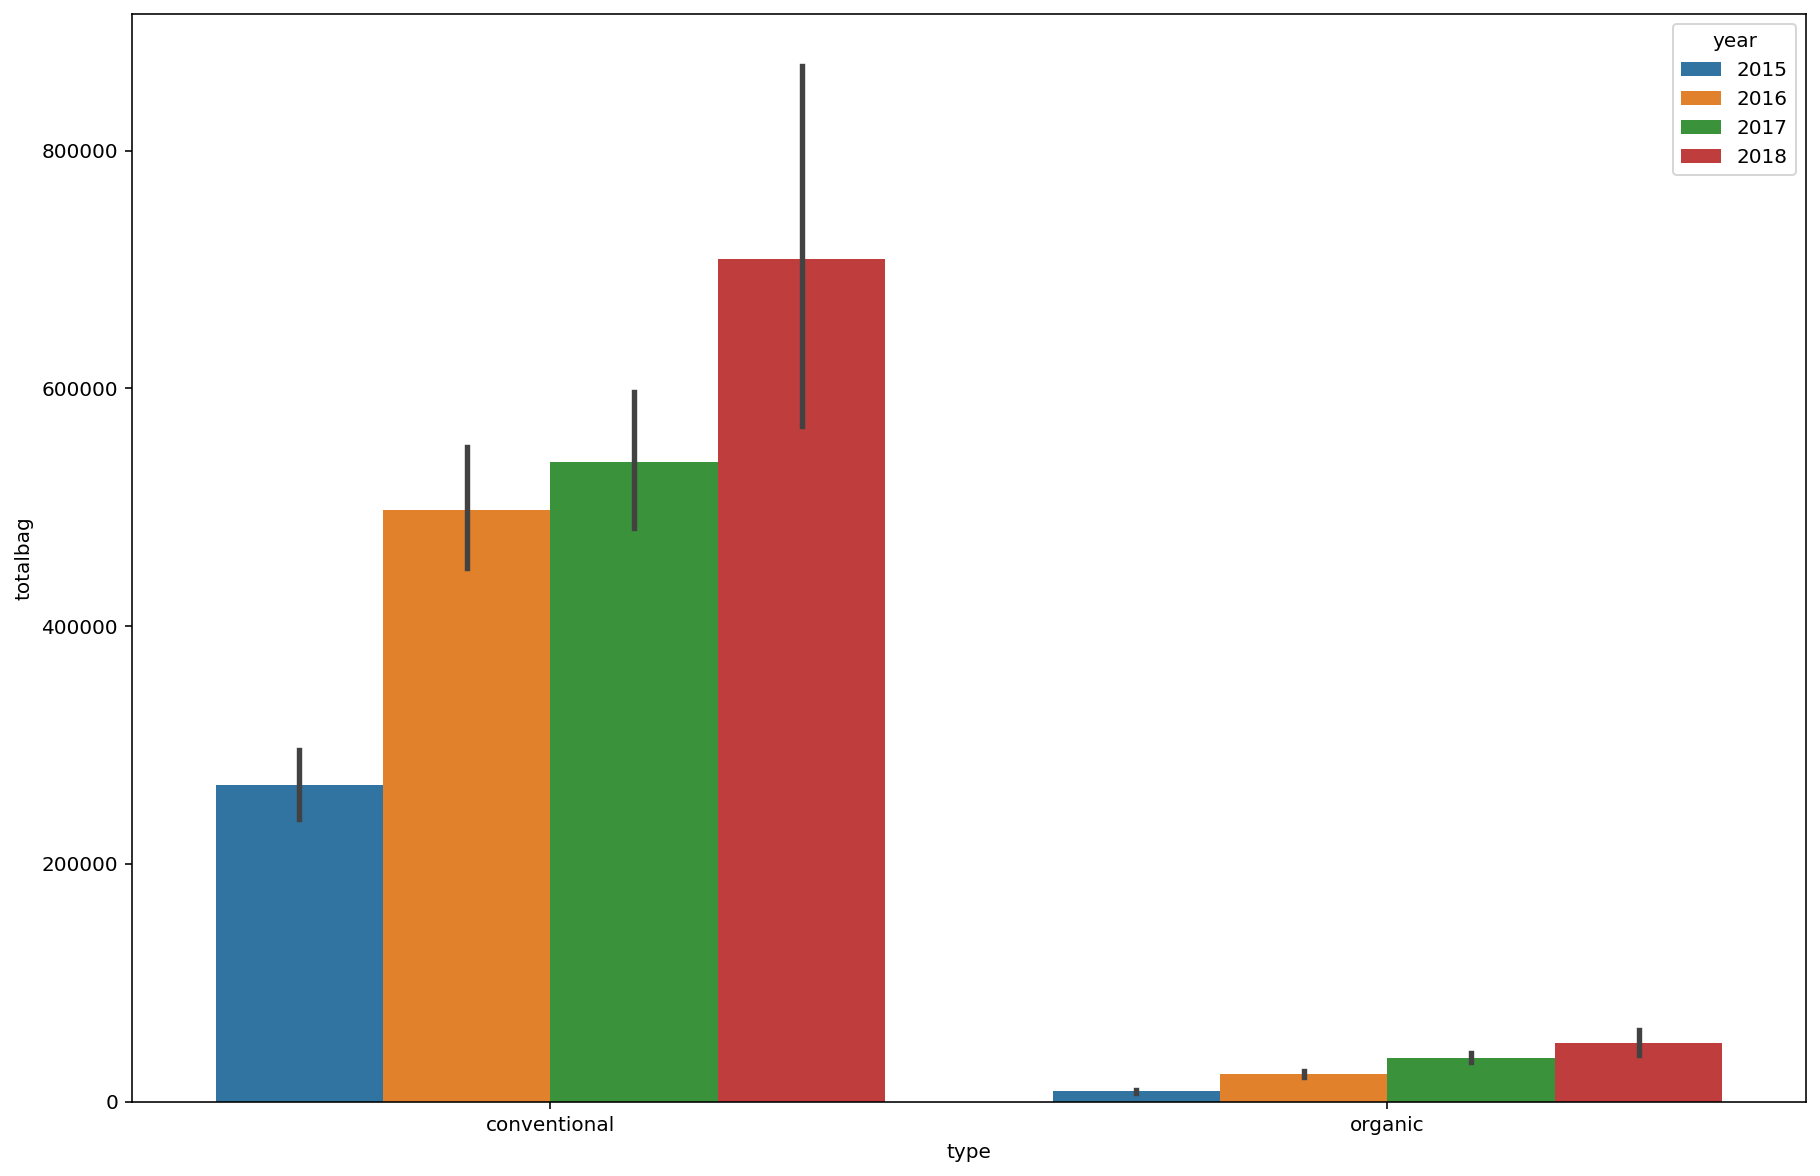

In [25]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="type", y="totalbag", hue="year", data=avocado)
plt.show()

#totalbags was high for conventional since the sale of conventional is higher compared to organic sales

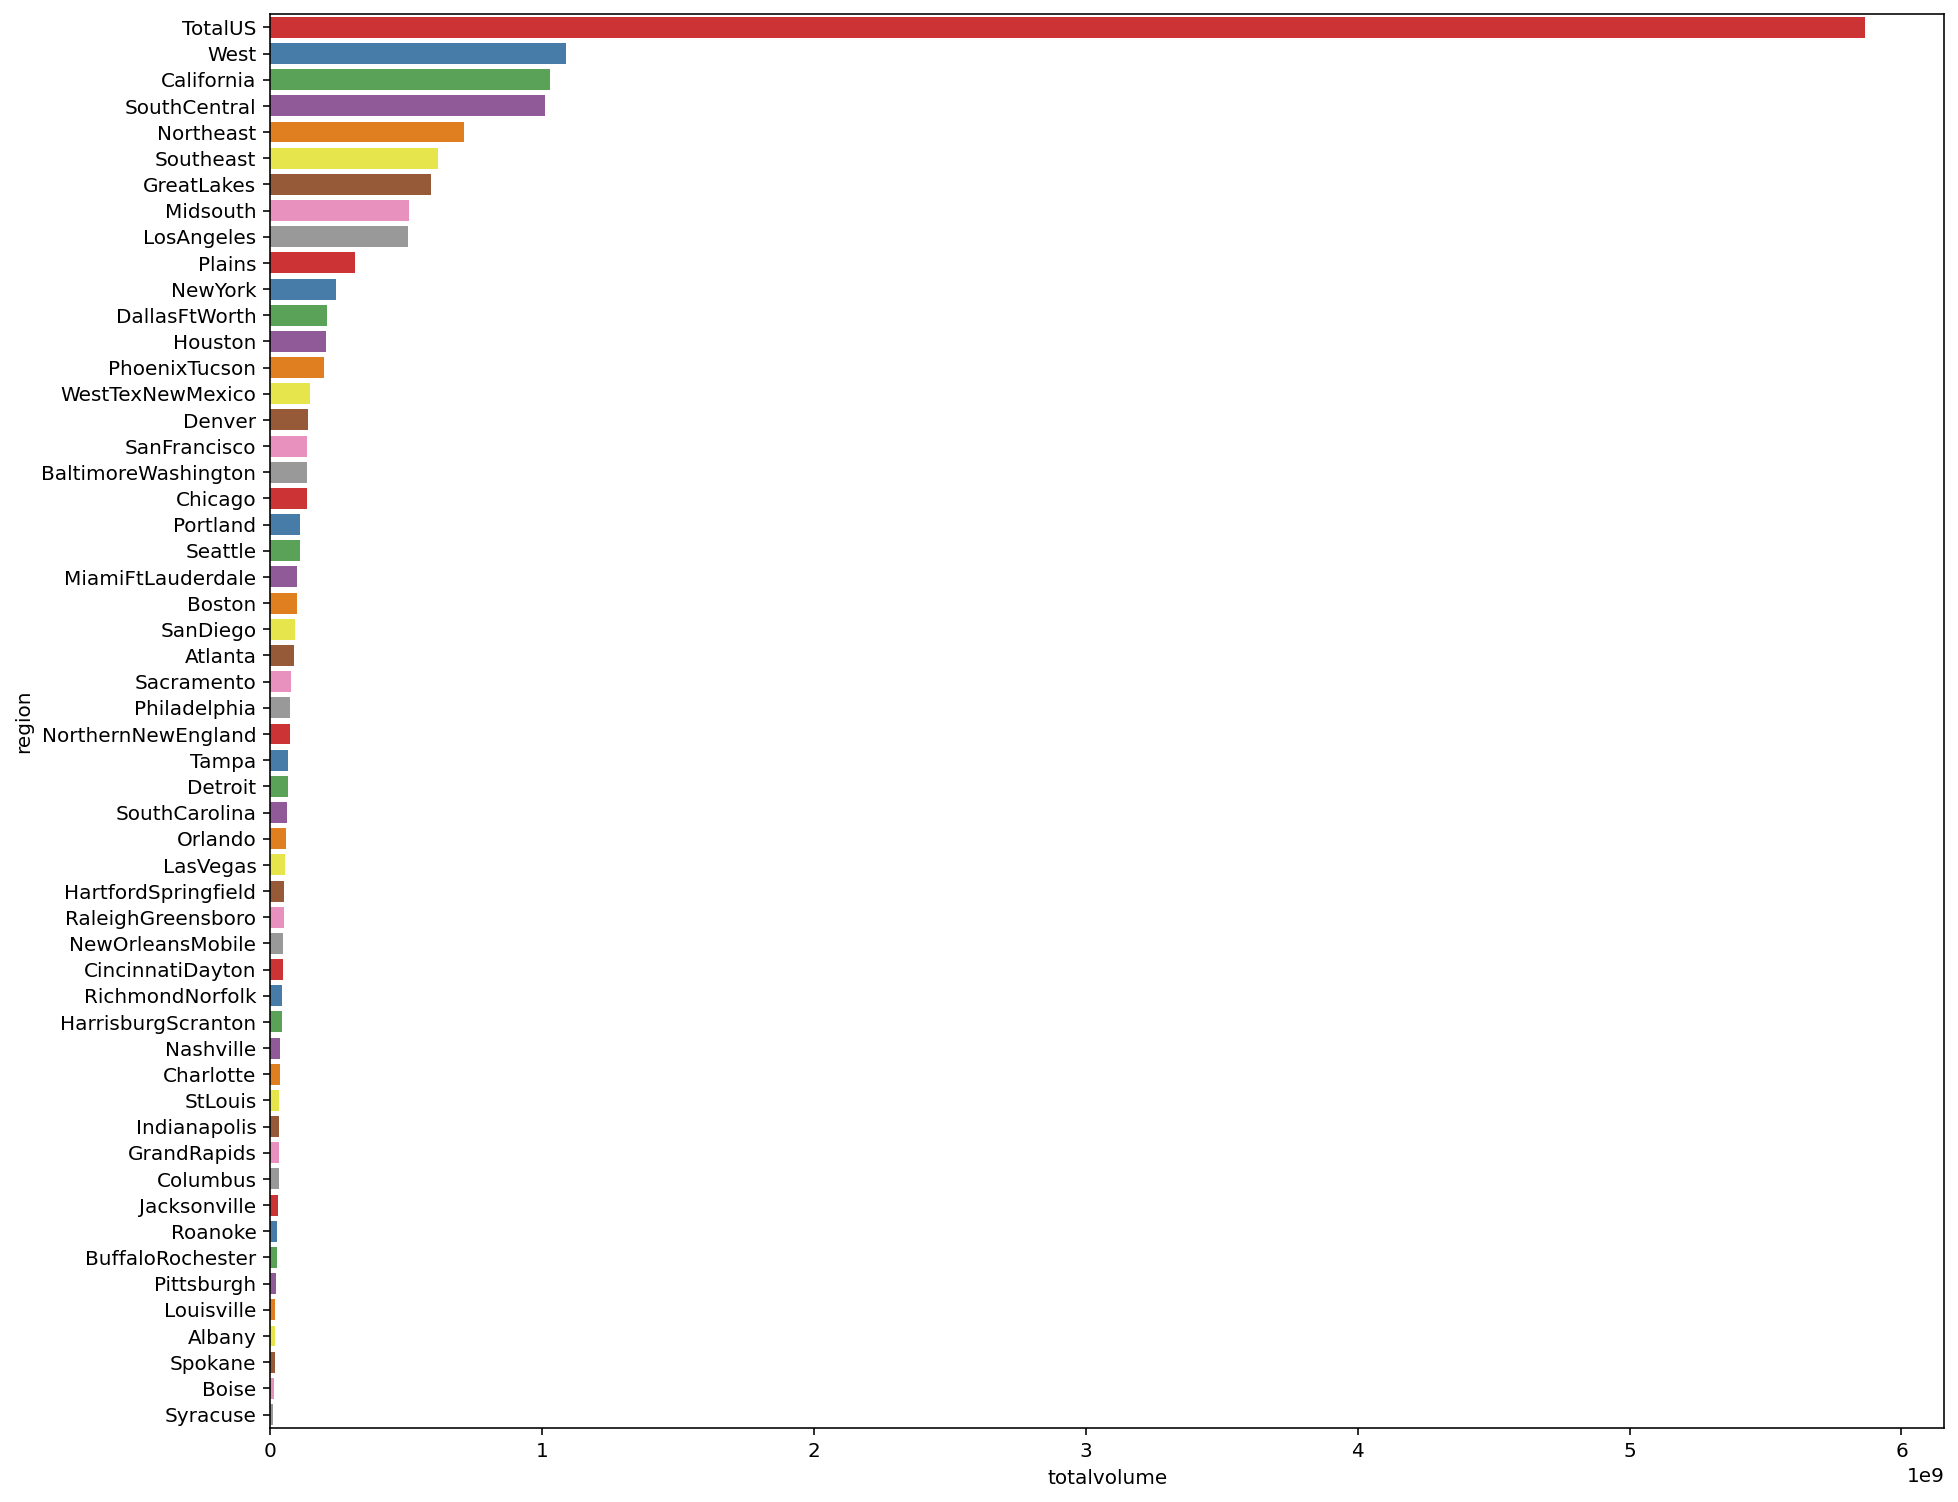

In [26]:
region = avocado.groupby('region')['totalvolume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["totalvolume"], y=region["region"], data=avocado, palette="Set1")
plt.show()

#data compared with regions with totalvolume.

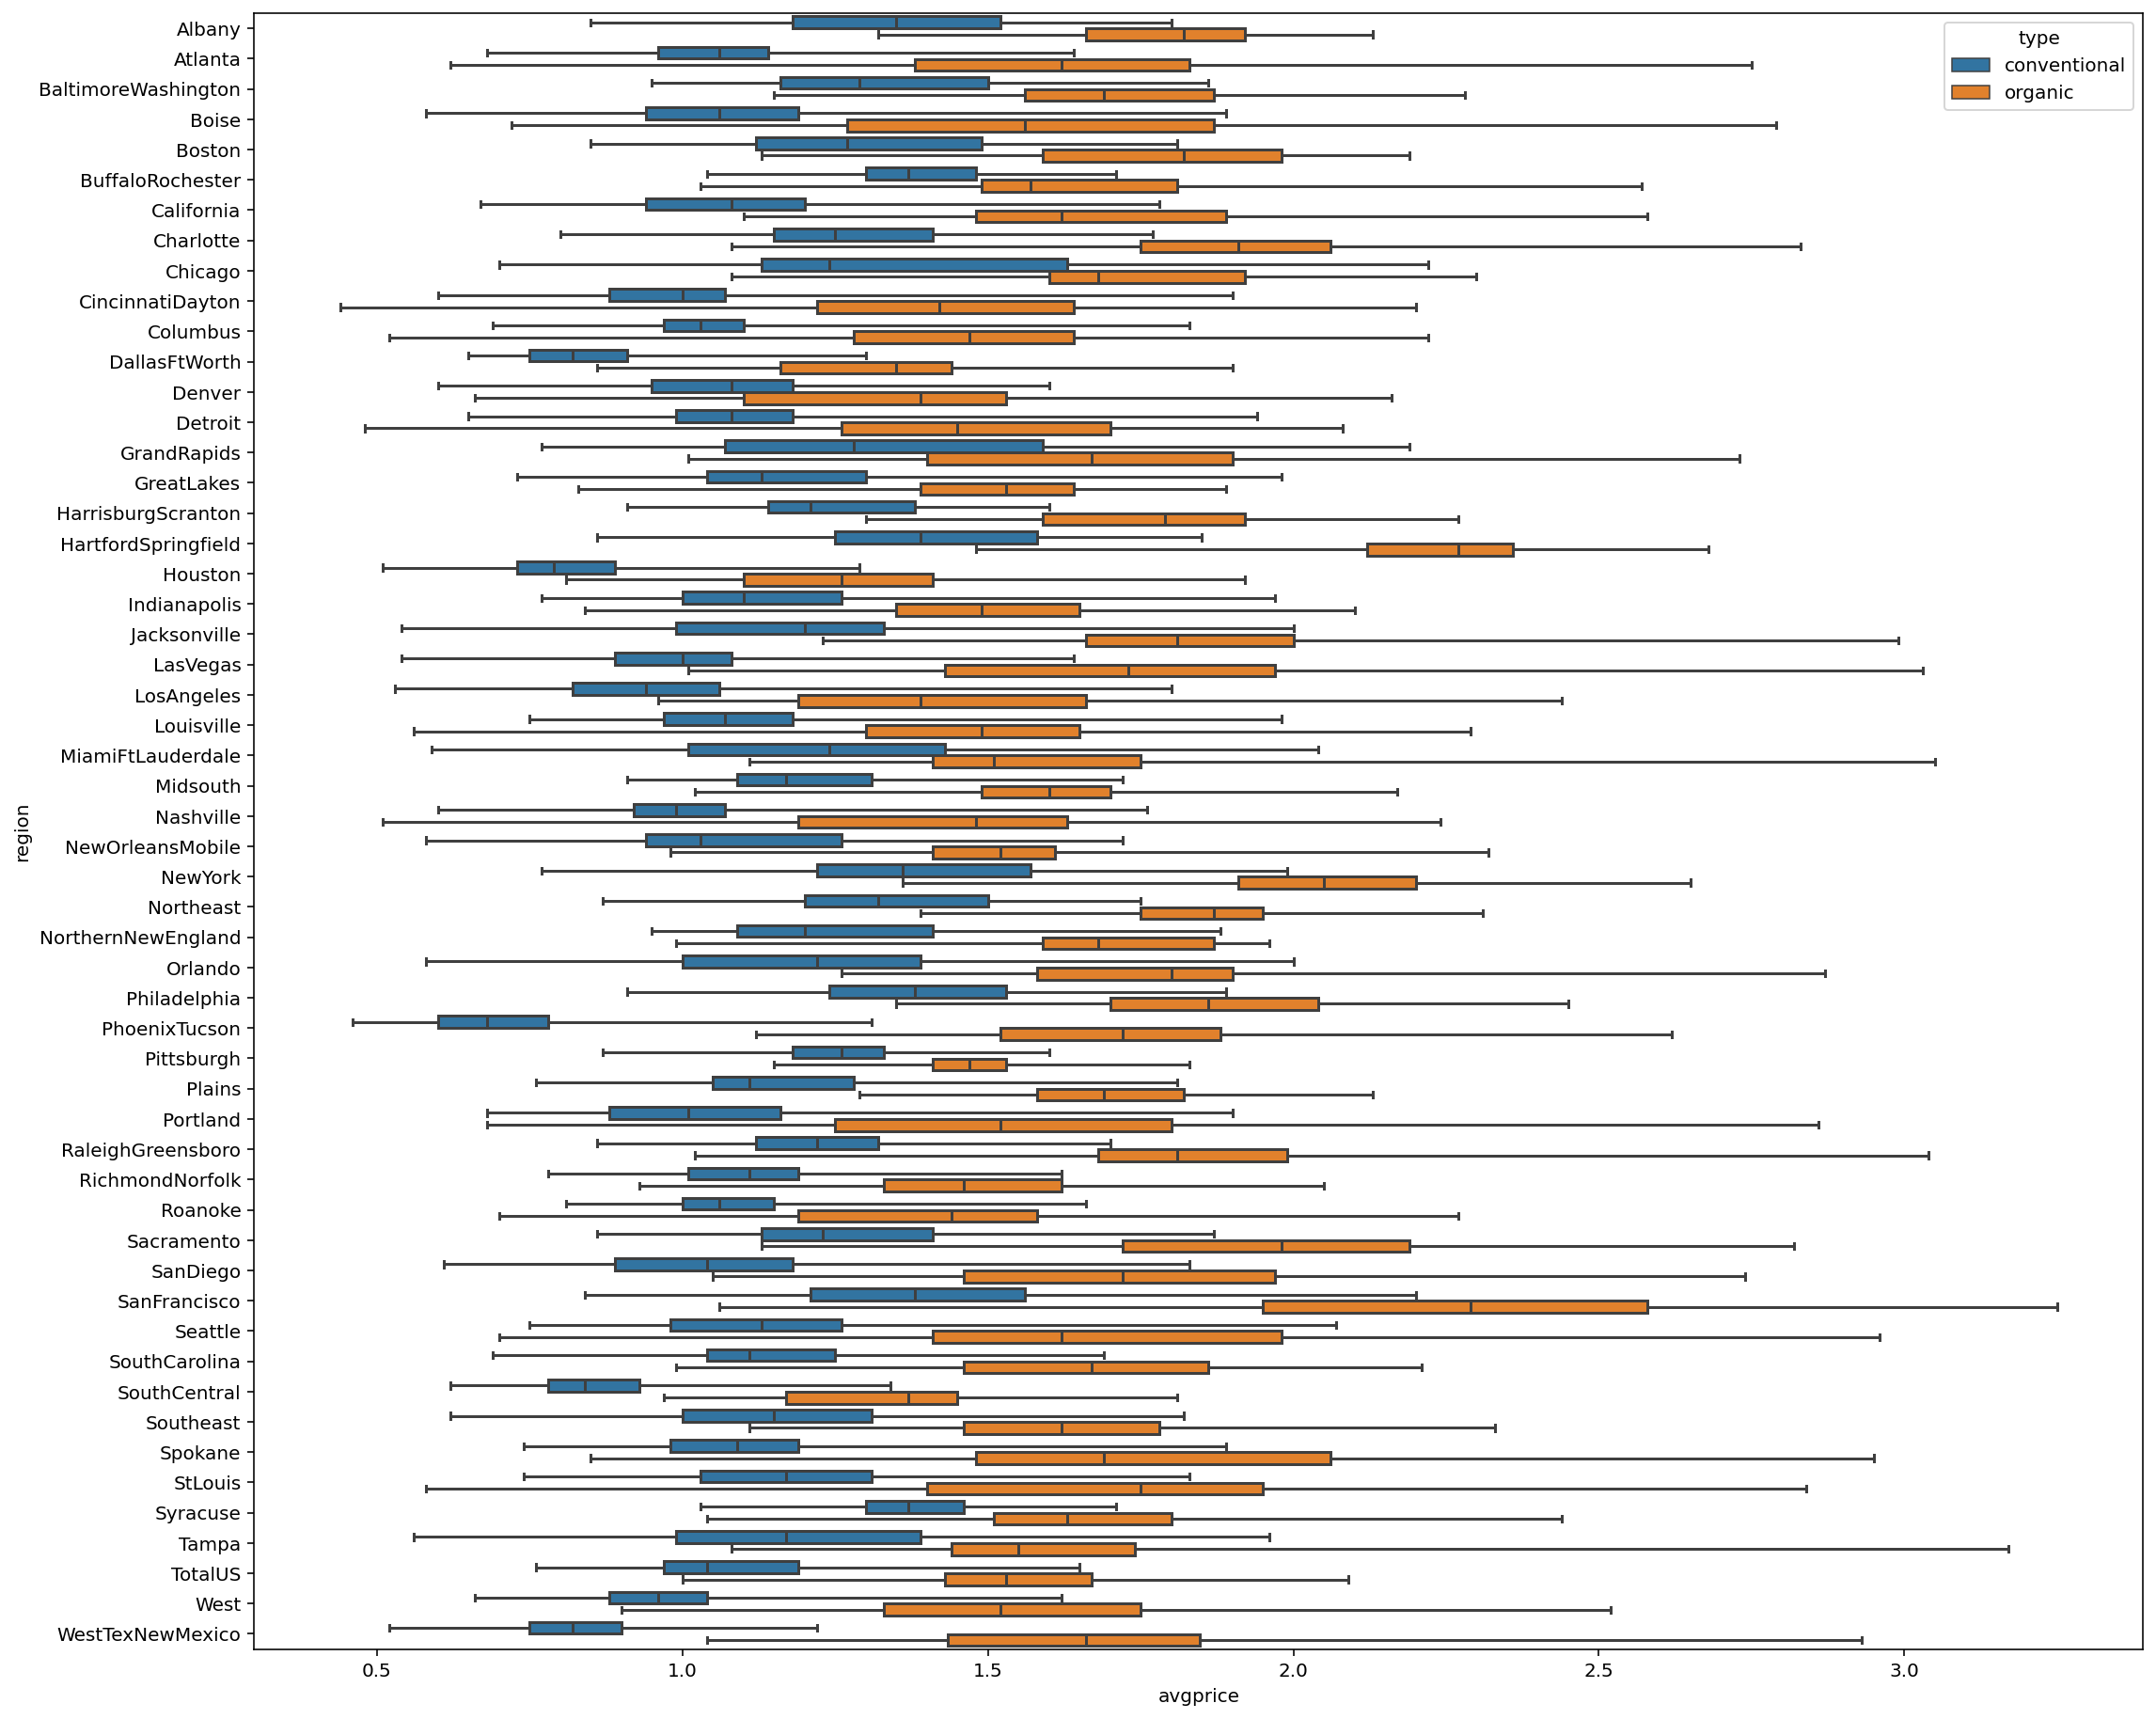

In [27]:
plt.figure(figsize=(18,16))
ax = sns.boxplot(x="avgprice", y="region", hue='type', data=avocado, whis=np.inf)
plt.show()

#price comparisson between conventional and organic region wise.

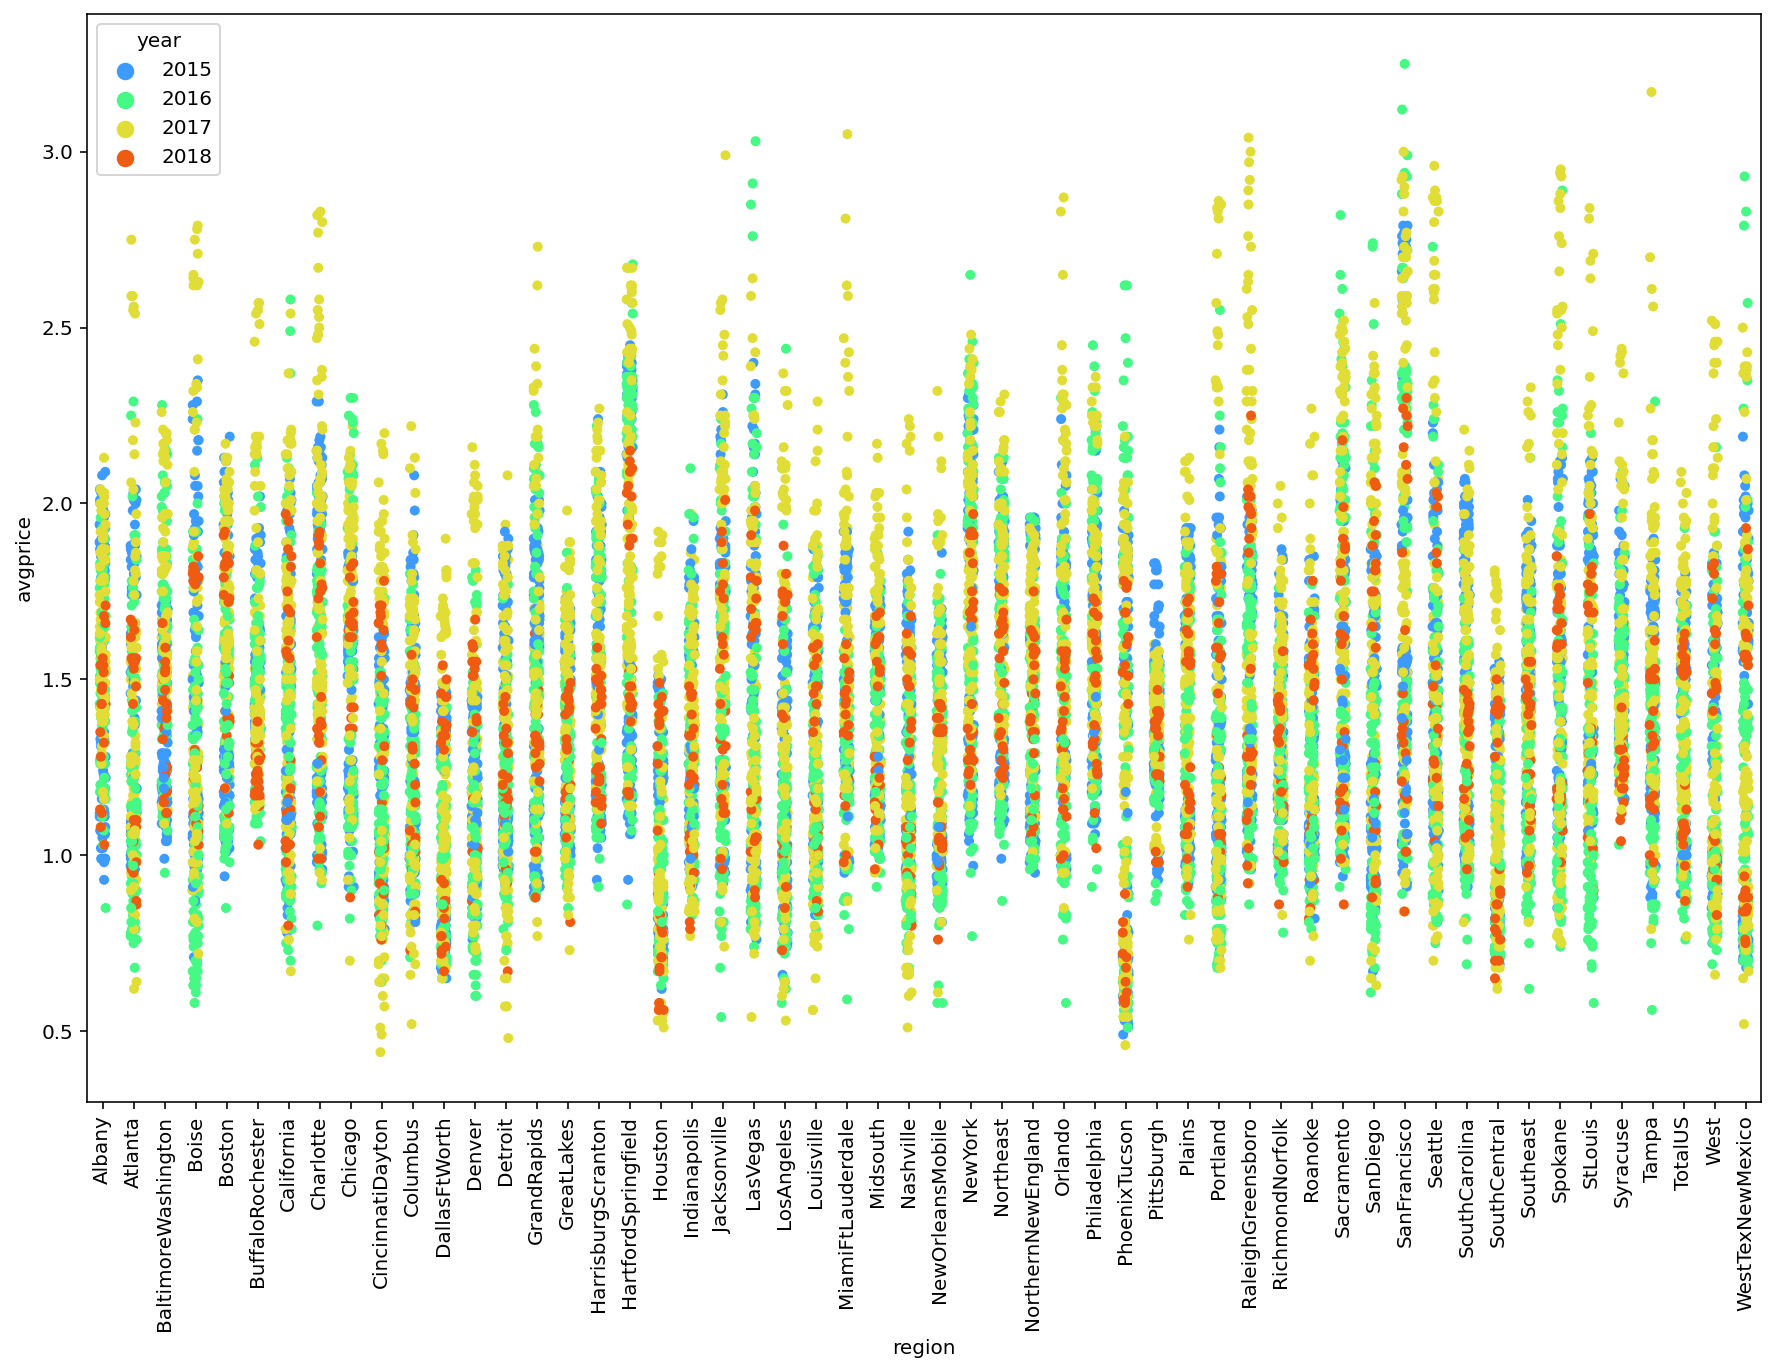

In [28]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='avgprice', hue="year", data=avocado, palette="turbo")
plt.xticks(rotation=90)
plt.show()

#comparing the price in all 4 years, 2016 & 2017 higher prices compared to 2015 & 2018.

In [29]:
#multivariate Analysis

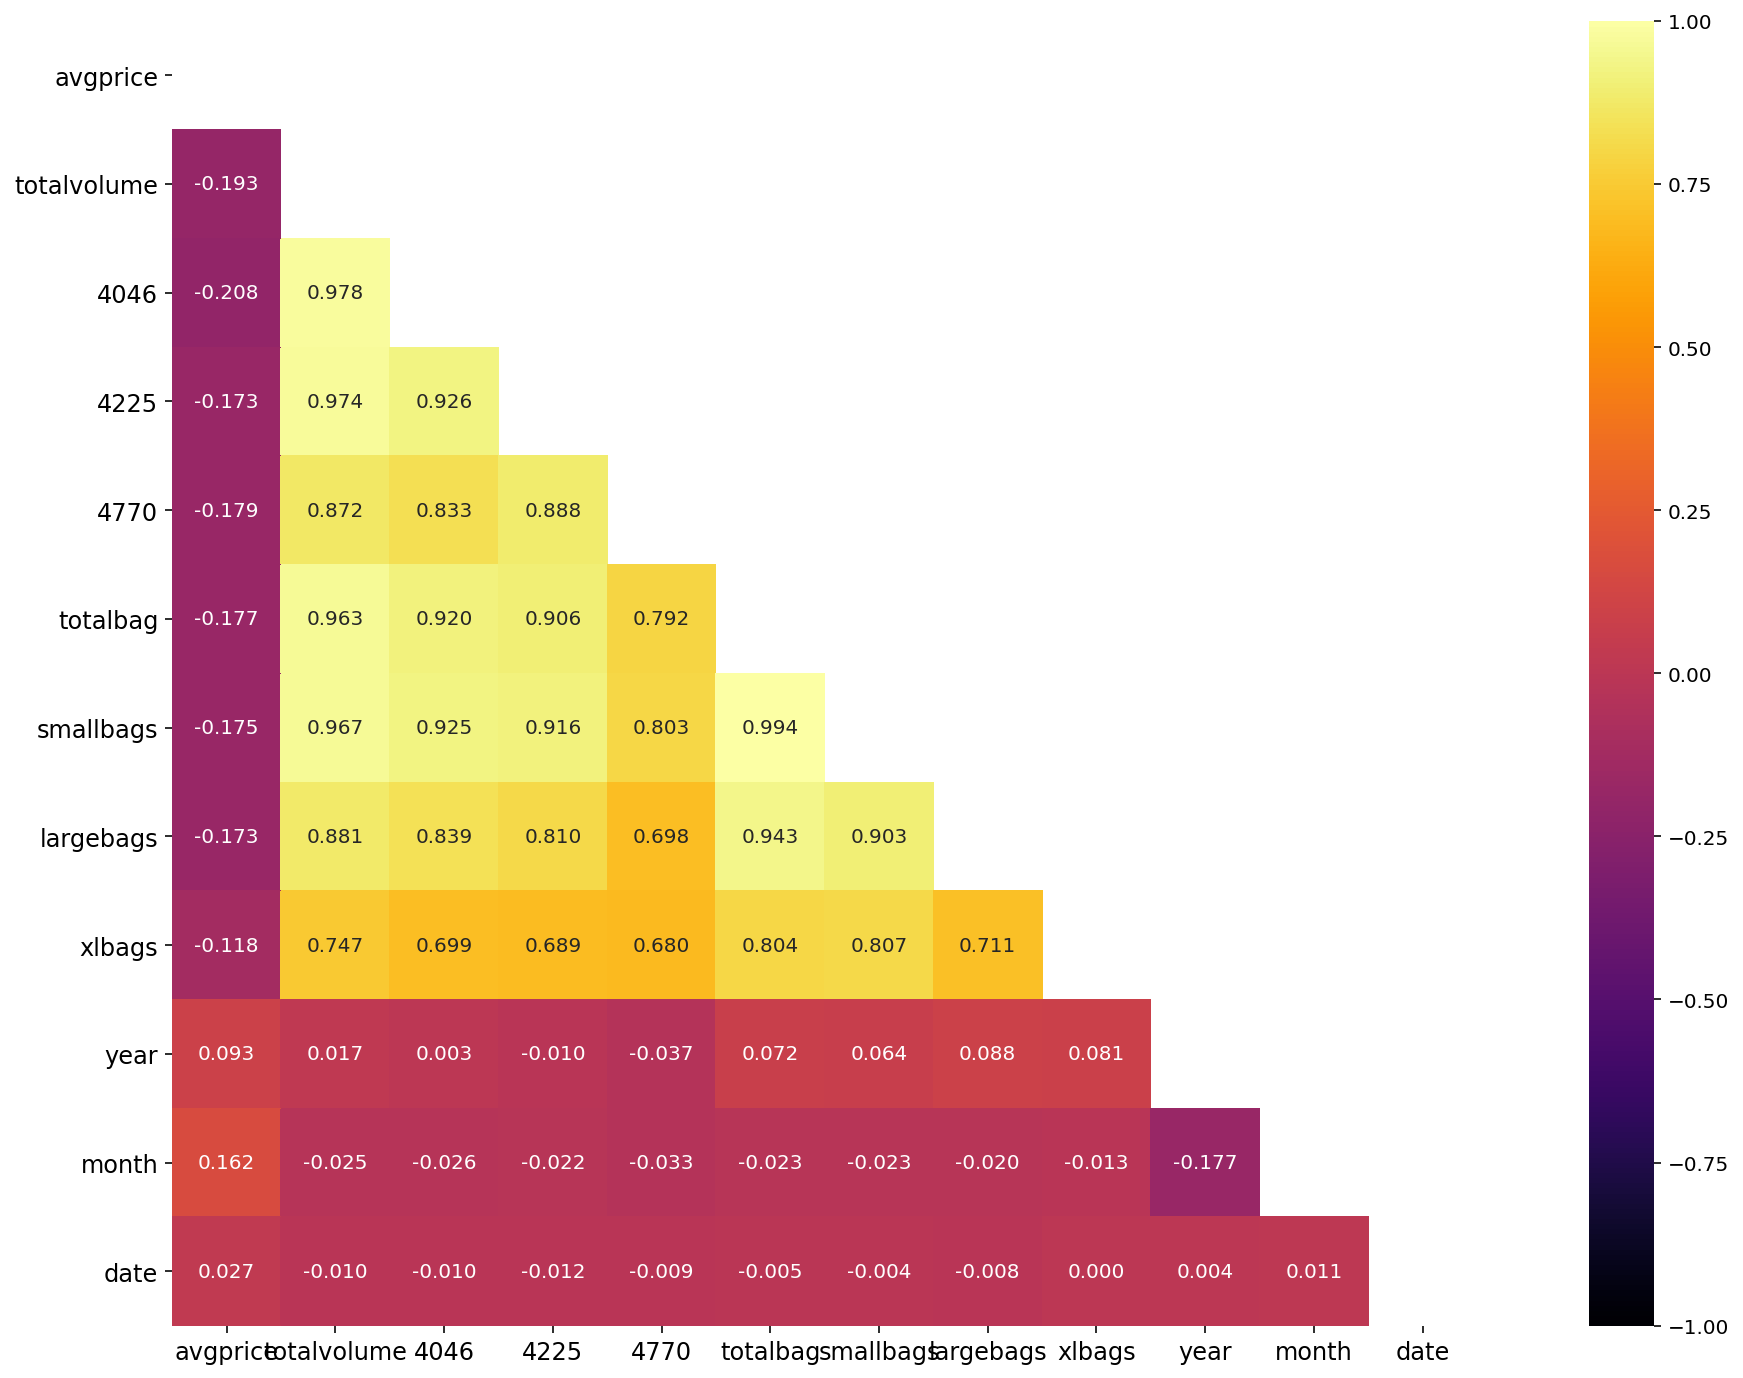

In [30]:
upper_triangle = np.triu(avocado.corr())
plt.figure(figsize=(20,12))
sns.heatmap(avocado.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [31]:
#generated a heatmap to understand the correlation details.

#from the above heatmap we understand that there is Multicollinearity present in columns. 2 types of correlation mail 
#positive correlation when a correlation of +1 indicates perfet correlation which means variables move in same direction together.
#Negatie correlation when a correlation of -1 indicates perfect negative correlation means that as one variable goes up and the other goes down.

#noticed that data of 4046, 4225, 4775 are all product codes which are already included in total volumes.
#also noticed that data of smallbags,largebags,xlbags are all already included with total bags.
#so dropping all the following columns 4046,4225,4775,smallbags,largebags and xlbags to sort out the Multicollinearity.

In [32]:
avocado.drop(["4046", "4225", "4770", "smallbags", "largebags", "xlbags"], axis=1, inplace=True)

In [33]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avgprice     18249 non-null  float64
 1   totalvolume  18249 non-null  float64
 2   totalbag     18249 non-null  float64
 3   type         18249 non-null  object 
 4   region       18249 non-null  object 
 5   year         18249 non-null  int32  
 6   month        18249 non-null  int32  
 7   date         18249 non-null  int32  
dtypes: float64(3), int32(3), object(2)
memory usage: 926.8+ KB


# Encoding

In [34]:
oe = OrdinalEncoder()
avocado['region']=oe.fit_transform(avocado['region'].values.reshape(-1,1))
avocado['type']=oe.fit_transform(avocado['type'].values.reshape(-1,1))
avocado.head()

#Using the ordinal encoding method we have changed the object datatype columns into numeric values as machine learning models cannot process object data types.

,avgprice,totalvolume,totalbag,type,region,year,month,date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29


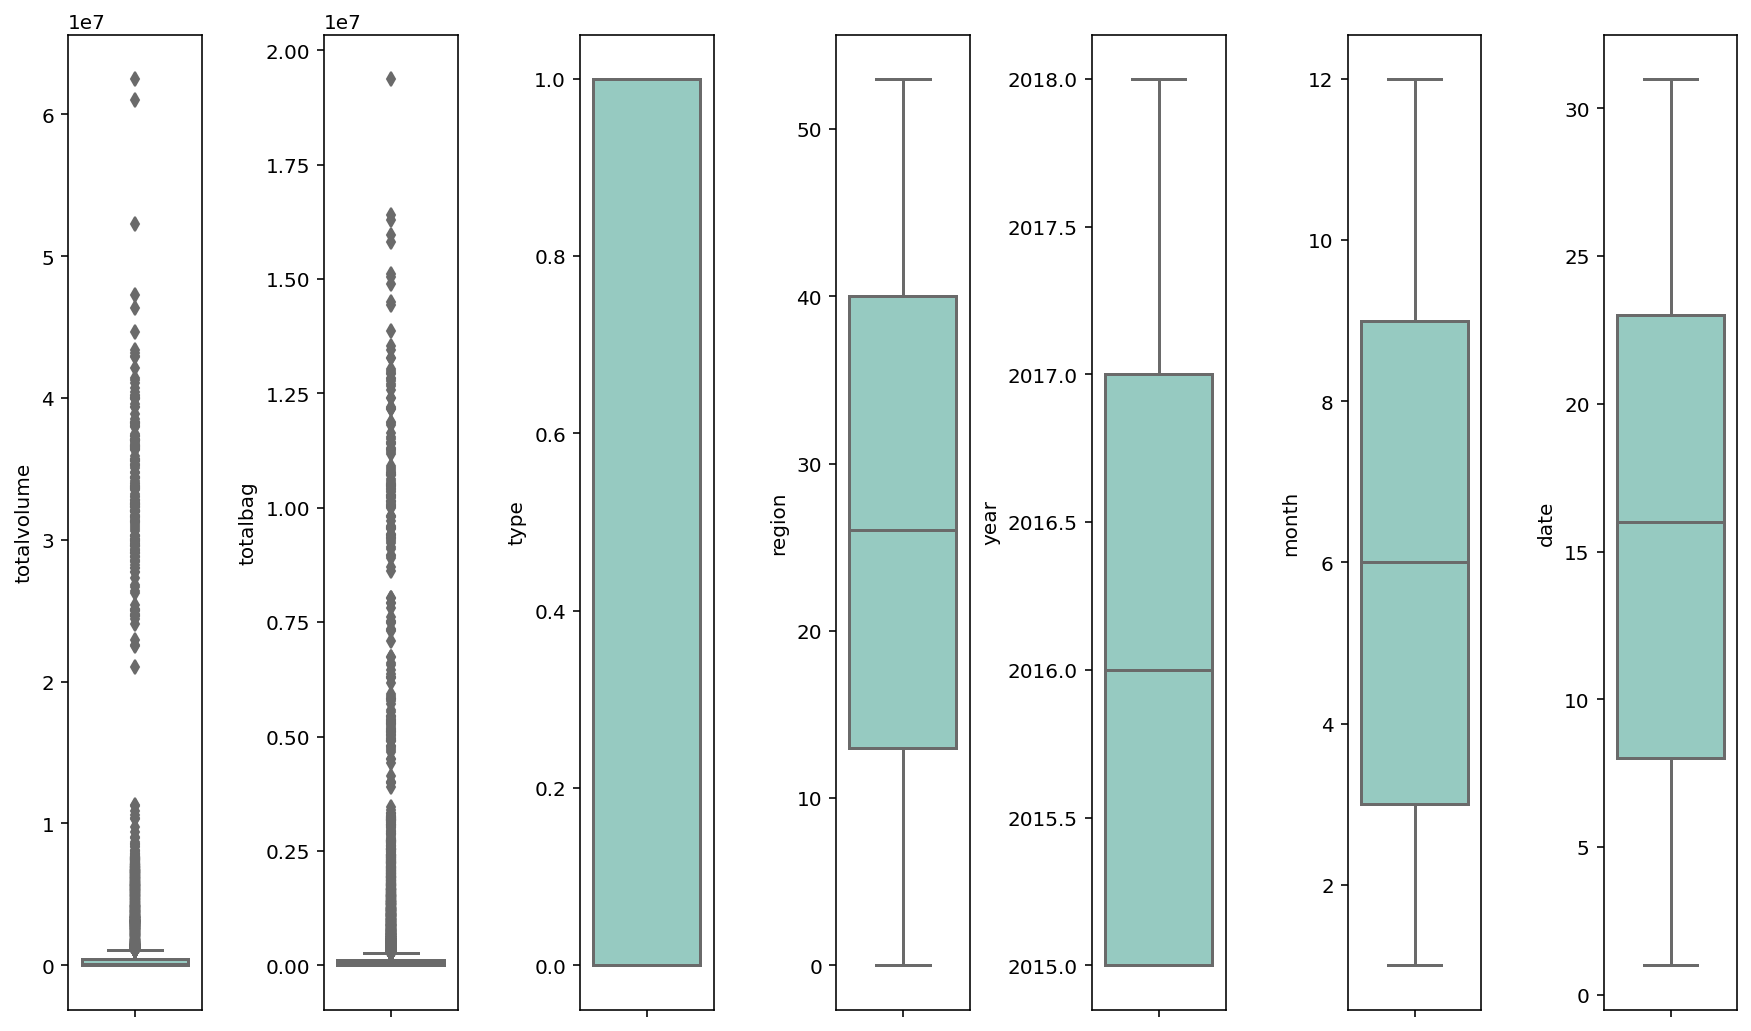

In [35]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = avocado.drop("avgprice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=avocado, ax=ax[index], palette="Set3")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

#outliers present in both totalvolume and totalbag, so it should be treated with zscore before the next step.

In [36]:
z = np.abs(zscore(avocado))
threshold = 3
avocado1 = avocado[(z<3).all(axis = 1)]

print ("Shape of the data before removing outliers: ", avocado.shape)
print ("Shape of the data after removing outliers: ", avocado1.shape)
print ("Percentage of data loss post outlier removal: ", (avocado.shape[0]-avocado1.shape[0])/avocado.shape[0]*100)

avocado=avocado1.copy() # reassigning the changed dataframe name to original dataframe name

Shape of the data before removing outliers:  (18249, 8)
Shape of the data after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


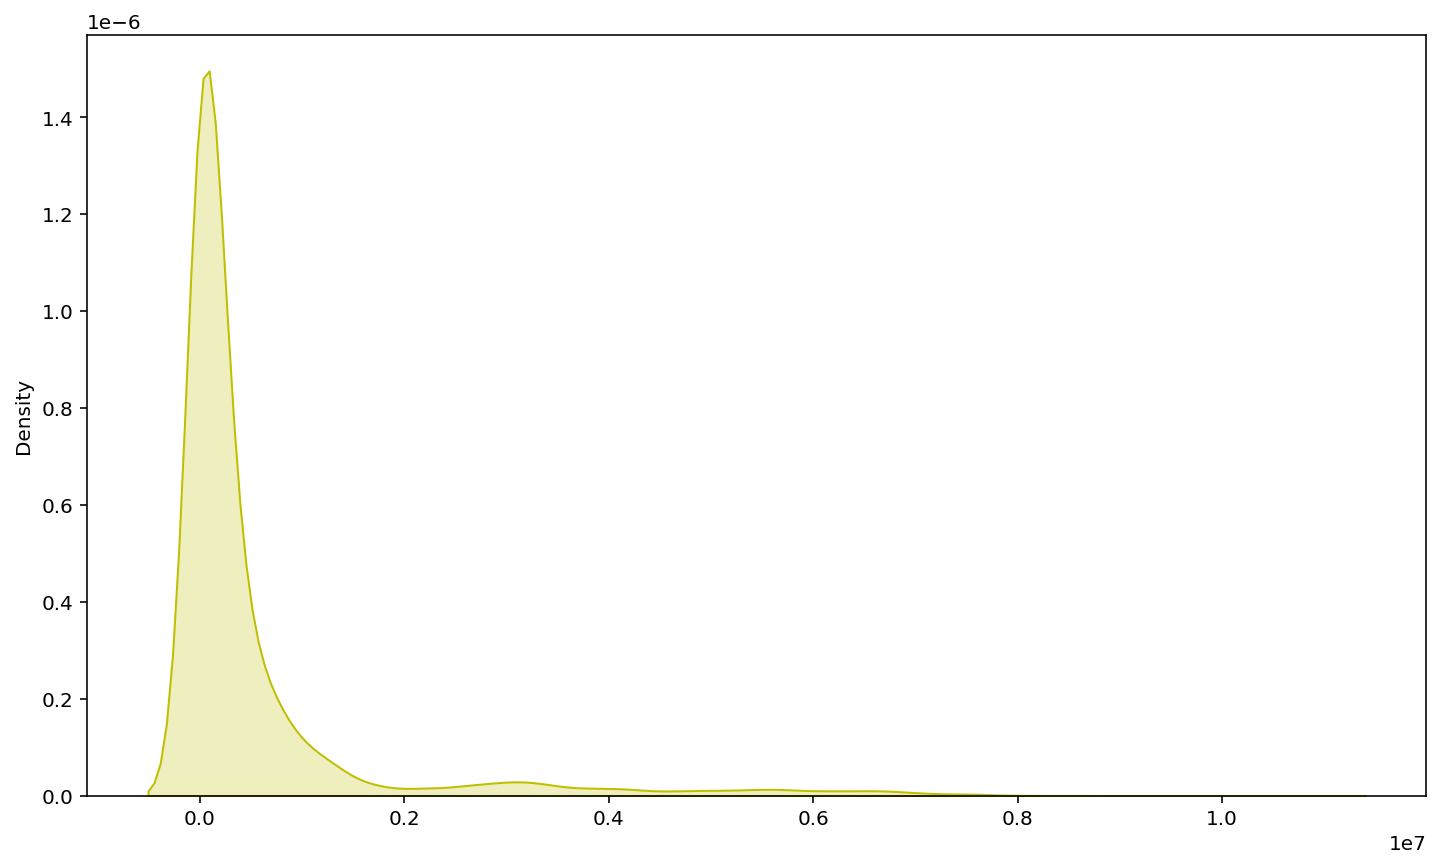

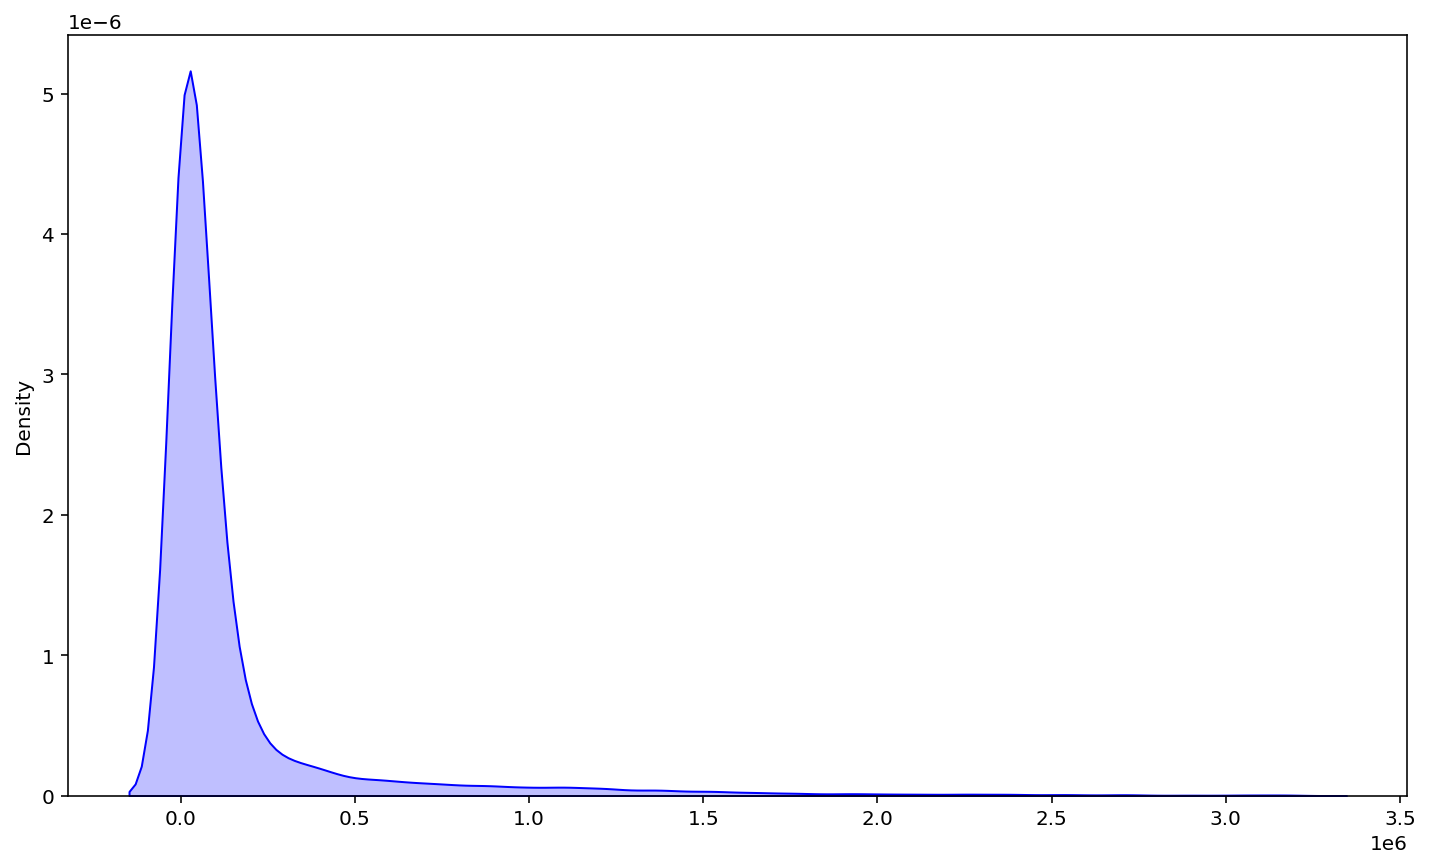

In [37]:
plt.figure(figsize=(12,7))
sns.distplot(x=avocado["totalvolume"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

plt.figure(figsize=(12,7))
sns.distplot(x=avocado["totalbag"], hist=False, color="b", kde_kws={"shade": True})
plt.show() 

#yellowgraph - totalvolume graph 
#bluegraph - totalbag graph

#both totalvolume & totalbag has right skewness.

# Using Log Transform to fix skewness

In [38]:
for col in avocado.columns:
    if avocado.skew().loc[col]>0.55:
        avocado[col]=np.log1p(avocado[col])

#Applied Log Transformation on columns to ensure that do not have skewness in dataset.
        
avocado.skew() #Now the dataset have all the columns almost in the range of +/-0.5

avgprice       0.388855
totalvolume   -0.024234
totalbag      -0.334742
type          -0.005912
region         0.014808
year           0.225227
month          0.114771
date           0.014381
dtype: float64

In [39]:
#Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [40]:
X = avocado.drop('avgprice', axis=1)
Y = avocado['avgprice']

In [41]:
#Splitting the dataset into 2 variables namely 'a' and 'c' for feature and label

In [42]:
a = avocado.drop('region', axis=1)
c = avocado['region']

In [43]:
#Scaling

In [44]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10) #scaling as per averageprice.

,totalvolume,totalbag,type,region,year,month,date
0,-0.090582,-0.493196,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.161393,-0.452528,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,0.183695,-0.523161,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,0.002395,-0.677598,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.193989,-0.649161,-1.00296,-1.694204,-1.215795,1.367566,1.519745
5,-0.152446,-0.613603,-1.00296,-1.694204,-1.215795,1.367566,0.721872
6,0.027100,-0.513521,-1.00296,-1.694204,-1.215795,1.367566,-0.076001
7,0.148946,-0.603766,-1.00296,-1.694204,-1.215795,1.367566,-0.873873
8,0.107584,-0.369872,-1.00296,-1.694204,-1.215795,1.367566,-1.671746
9,-0.024906,-0.496942,-1.00296,-1.694204,-1.215795,1.084793,1.063818


# Finding best random state for building Regression Models

In [45]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS) #for avaerageprice data.

Best R2 score is 0.5021238214614996 on Random State 144


# training and testing the datasets for average price data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144) #for averageprice data

# Machine Learning Model for Regression with Evaluation Metrics

In [47]:
# Regression Model Function for average price data

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [48]:
# Linear Regression Model for average price data.

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.2843241073646302
R2 Score is: 47.91662124818624
Cross Validation Score: 12.299369206677339
R2 Score - Cross Validation Score is 35.6172520415089


In [49]:
# Ridge Regression for averageprice data

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.2846821292406461
R2 Score is: 47.785371532369645
Cross Validation Score: 12.572883789963557
R2 Score - Cross Validation Score is 35.21248774240609


In [50]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.2846821292406461
R2 Score is: 47.785371532369645
Cross Validation Score: 12.572883789963557
R2 Score - Cross Validation Score is 35.21248774240609


In [51]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.39412850641568486
R2 Score is: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.63930668388727


In [52]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.2628223421424579
R2 Score is: 55.4962770108585
Cross Validation Score: -17.860820345389936
R2 Score - Cross Validation Score is 73.35709735624843


In [53]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.34848526628312076
R2 Score is: 21.757877423965287
Cross Validation Score: -140.99004624014927
R2 Score - Cross Validation Score is 162.74792366411455


In [54]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.300390487406133
R2 Score is: 41.86413583780265
Cross Validation Score: -13.930307772098965
R2 Score - Cross Validation Score is 55.79444360990161


In [55]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.2992842204933715
R2 Score is: 42.29154855195358
Cross Validation Score: -16.636174643915457
R2 Score - Cross Validation Score is 58.927723195869035


In [56]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.27927403290805664
R2 Score is: 49.75036697133661
Cross Validation Score: -14.391812288553416
R2 Score - Cross Validation Score is 64.14217925989003


In [57]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.2731855113353641
R2 Score is: 51.91749271525534
Cross Validation Score: -2.2062818905596826
R2 Score - Cross Validation Score is 54.12377460581502


In [58]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.17740075450540066
R2 Score is: 79.7239802062522
Cross Validation Score: 16.327809657647975
R2 Score - Cross Validation Score is 63.39617054860422


In [59]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 0.13156329541646664
R2 Score is: 88.84829511848271
Cross Validation Score: 39.48804192771808
R2 Score - Cross Validation Score is 49.36025319076463


# Hyper parameter tuning on the best ML Model

In [60]:
# Choosing XGB Regressor since the R2 Score is higher

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [61]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [62]:
GSCV.best_score_

0.7423465479786919

In [63]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 78.88427707762189


In [64]:
#Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label - for region data

In [65]:
X = avocado.drop('region', axis=1)
Y = avocado['region']

In [66]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10) #scaling as per averageprice.

,avgprice,totalvolume,totalbag,type,year,month,date
0,-0.179547,-0.090582,-0.493196,-1.00296,-1.215795,1.650340,1.291781
1,-0.127800,-0.161393,-0.452528,-1.00296,-1.215795,1.650340,0.493909
2,-1.214487,0.183695,-0.523161,-1.00296,-1.215795,1.650340,-0.303964
3,-0.826385,0.002395,-0.677598,-1.00296,-1.215795,1.650340,-1.101837
4,-0.308915,-0.193989,-0.649161,-1.00296,-1.215795,1.367566,1.519745
5,-0.360662,-0.152446,-0.613603,-1.00296,-1.215795,1.367566,0.721872
6,-1.059246,0.027100,-0.513521,-1.00296,-1.215795,1.367566,-0.076001
7,-1.085120,0.148946,-0.603766,-1.00296,-1.215795,1.367566,-0.873873
8,-0.981626,0.107584,-0.369872,-1.00296,-1.215795,1.367566,-1.671746
9,-0.852258,-0.024906,-0.496942,-1.00296,-1.215795,1.084793,1.063818


# Finding best random state for building Regression Models for region data

In [67]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS) #for avaerageprice data.

Best R2 score is 0.03421394010333112 on Random State 339


# training and testing the datasets for region data

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144) #for averageprice data

# Machine Learning Model for Regression with Evaluation Metrics

In [69]:
# Regression Model Function for average price data

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [70]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 15.172027399159225
R2 Score is: 1.7866758219166834
Cross Validation Score: -37.052534099257805
R2 Score - Cross Validation Score is 38.839209921174486


In [71]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 15.170353821884133
R2 Score is: 1.8083418152217257
Cross Validation Score: -36.28911063680845
R2 Score - Cross Validation Score is 38.097452452030176


In [72]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 15.305339407498392
R2 Score is: 0.05315170860648033
Cross Validation Score: -19.261212460137713
R2 Score - Cross Validation Score is 19.314364168744195


In [73]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 14.960456650253574
R2 Score is: 4.506706064076138
Cross Validation Score: -85.10448275083246
R2 Score - Cross Validation Score is 89.6111888149086


In [74]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 19.277970070145084
R2 Score is: -58.56443242526805
Cross Validation Score: -186.50611759909083
R2 Score - Cross Validation Score is 127.94168517382278


In [75]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 15.139380235053395
R2 Score is: 2.208891874758867
Cross Validation Score: -29.90266746247951
R2 Score - Cross Validation Score is 32.111559337238376


In [76]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 15.116403739045635
R2 Score is: 2.505494767738148
Cross Validation Score: -29.786098137043272
R2 Score - Cross Validation Score is 32.29159290478142


In [77]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 24.363500393425333
R2 Score is: -153.257633405873
Cross Validation Score: -195.08478065618485
R2 Score - Cross Validation Score is 41.82714725031184


In [78]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 15.055598134126294
R2 Score is: 3.2882588930272405
Cross Validation Score: -118.16324044924585
R2 Score - Cross Validation Score is 121.45149934227308


In [79]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 13.451204495131046
R2 Score is: 22.802093255557743
Cross Validation Score: -146.9722049908378
R2 Score - Cross Validation Score is 169.77429824639555


In [80]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 12.946145675989612
R2 Score is: 28.490432203113535
Cross Validation Score: -162.28848842538278
R2 Score - Cross Validation Score is 190.7789206284963


In [81]:
# Hyper parameter tuning on the best ML Model (for region-wise data)

In [82]:
# Choosing XGB Regressor since the R2 Score is higher

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [83]:
GSCV.best_params_

{'gamma': 4.0, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': -2}

In [84]:
GSCV.best_score_

0.25434726486579057

In [133]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 77.42692888288062


In [147]:
#R2 score for the Best Model is: 77.42692888288062 - #Region-Wise Data
#Best R2 score is 0.03421394010333112 on Random State 339 - #Average Price Data
